In [1]:
from sklearn.decomposition import PCA
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GMM

In [2]:
# lista unificada con las estaciones que cumplen al menos un criterio
# 0= numero de criterios cumplidos, 1= codigo, 2,3=lonlat, 4=altura
listam=np.loadtxt('listam.txt')

In [3]:
# Contamos cuantas variables fueron medidas por estacion, se almacena en tomados (cuyo indice coincide con el indice de listam)
df=pd.read_csv('lluvia.csv')
tomados=np.zeros(len(listam[:,1]))
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1
df=pd.read_csv('humedad.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1
df=pd.read_csv('diaslluvia.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1  
df=pd.read_csv('brillo.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1 

In [5]:
(tomados-listam[:,0]==0).sum()

155

In [4]:
#probfilter=np.logical_not(((listam[:,0]==1)*((tomados-listam[:,0]==0)|(tomados-listam[:,0]==1)))|((listam[:,0]==2)*(tomados-listam[:,0]==0)))
probfilter=(tomados-listam[:,0]==0)
listacorta=listam[probfilter]
incog=4-listam[:,0][probfilter]

In [7]:
listacorta[:,0]

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,
        2.,  2.,  2.,  4.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        1.,  2.,  1.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  2.,  4.,  1.,
        2.,  4.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  3.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,  2.,  2.,  2.])

(-5, 14)

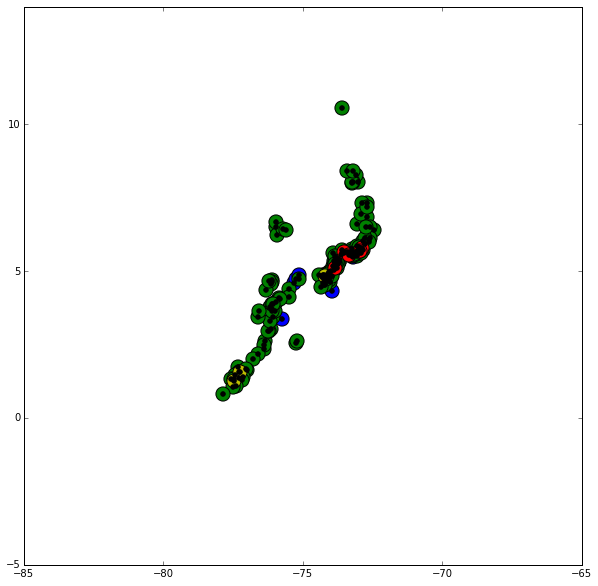

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta[:,2][incog==3.],-listacorta[:,3][incog==3.],c='b',s=200)
plt.scatter(-listacorta[:,2][incog==2.],-listacorta[:,3][incog==2.],c='g',s=200)
plt.scatter(-listacorta[:,2][incog==1.],-listacorta[:,3][incog==1.],c='y',s=200)
plt.scatter(-listacorta[:,2][incog==0.],-listacorta[:,3][incog==0.],c='r',s=200)
plt.scatter(-listacorta[:,2],-listacorta[:,3],c='k')
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [6]:
def genprob2(paux3,paux4):
    p3=1./4
    p4=1./16
    p33=p3*paux3
    p34=p4*paux4
    return p33+p34  

In [7]:
def parseprob2(i,j):
    if((i==4.)&(j==0.)):
        return genprob2(0.,1.)
    if((i==3.)&(j==0.)):
        return genprob2(1.,0.)
    if((i==3.)&(j==1.)):
        return genprob2(4./5,1./5)
    if((i==2.)&(j==1.)):
        return genprob2(4./10,0.)
    if((i==2.)&(j==2.)):
        return genprob2(4./11,1./11)
    if((i==1.)&(j==2.)):
        return genprob2(4./14,0.)
    if((i==1.)&(j==3.)):
        return genprob2(4./15,1./15)

In [8]:
probarr=np.zeros(len(incog))
for i in range(len(incog)):
    probarr[i]=parseprob2(listacorta[i,0],incog[i])
    if(listacorta[i,0]==4):
        print listacorta[i,0],incog[i]

4.0 0.0
4.0 0.0
4.0 0.0
4.0 0.0
4.0 0.0


(-5, 14)

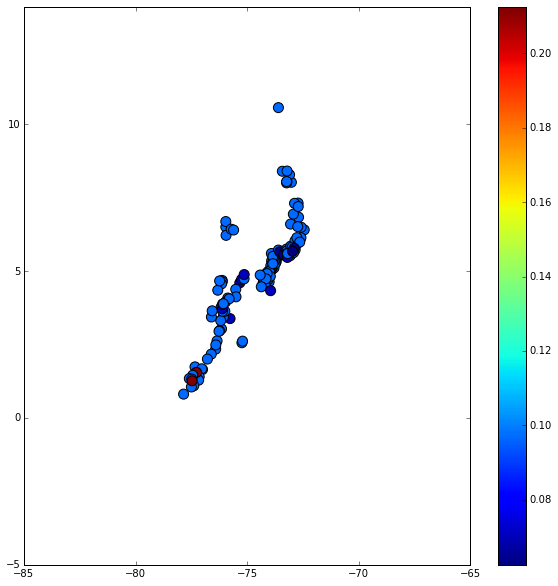

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta[:,2],-listacorta[:,3],c=probarr,s=100)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [10]:
def parseprob3(i,j):
    if((i==4.)&(j==0.)):
        return genprob2(0.,1.)
    if((i==3.)&(j==1.)):
        return genprob2(0.,1./5)
    if((i==2.)&(j==2.)):
        return genprob2(0.,1./11)
    if((i==1.)&(j==3.)):
        return genprob2(0,1./15)

In [11]:
probarr3=np.zeros(len(incog))
for i in range(len(incog)):
    probarr3[i]=parseprob3(listacorta[i,0],incog[i])

In [12]:
colvec=np.loadtxt('colvecdep.txt')

(-5, 14)

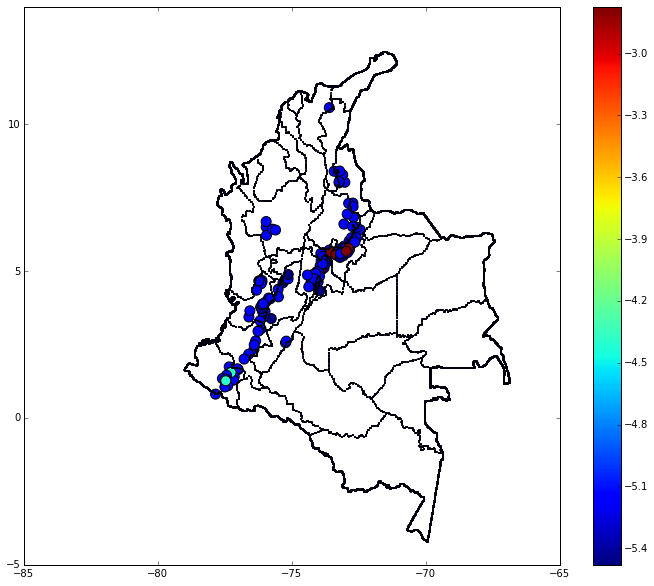

In [13]:
plt.figure(figsize=(12,10))
plt.scatter(-listacorta[:,2],-listacorta[:,3],c=np.log(probarr3),s=100)
plt.colorbar()
plt.scatter(colvec[:,0],colvec[:,1],s=1)
plt.xlim(-85,-65)
plt.ylim(-5,14)

(-5, 14)

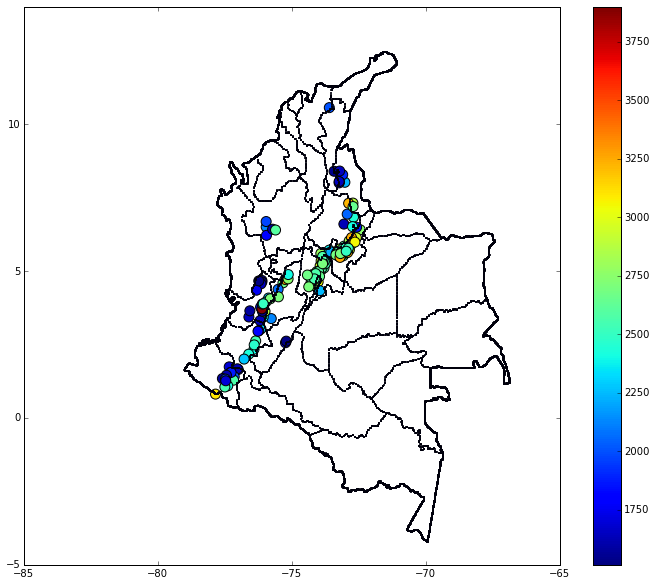

In [14]:
plt.figure(figsize=(12,10))
plt.scatter(-listacorta[:,2],-listacorta[:,3],c=listacorta[:,4],s=100)
plt.colorbar()
plt.scatter(colvec[:,0],colvec[:,1],s=1)
plt.xlim(-85,-65)
plt.ylim(-5,14)

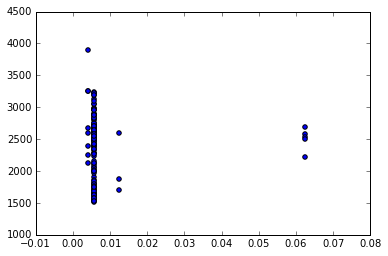

In [15]:
plt.scatter(probarr3,listacorta[:,4])

In [16]:
probarr3*165*16

array([  15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,
         15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,
         15.,   15.,   15.,   15.,   11.,   15.,   15.,   15.,   15.,
         15.,   15.,  165.,   33.,   15.,   15.,   15.,   15.,   15.,
         15.,   15.,   15.,   11.,   15.,   11.,   15.,   11.,   11.,
         15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,
         15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,
         15.,   15.,   15.,  165.,   15.,   15.,   15.,   15.,   15.,
         15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,
         15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,
         15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,
         15.,  165.,   15.,  165.,   11.,   15.,  165.,   15.,   15.,
         15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,
         15.,   11.,   15.,   15.,   15.,   15.,   15.,   15.,   15.,
         15.,   15.,

In [17]:
# generación de lista expandida que incluye pesos enteros para cada estación
lendata=(probarr3*165*16).sum().astype(int)
wdata=(probarr3*165*16).astype(int)
listaexp=np.zeros((lendata,5))
kcount=0
for i in range(len(probarr3)):        
    for kinx in range(wdata[i]):
        listaexp[kinx+kcount,:]=listacorta[i,:]
    kcount=kcount+kinx+1   

In [21]:
# clustering por mixtura gaussiana de la lista expandida, buscando un mínimo local para el criterio de información bayesiano
# el agrupamiento se hace por lon,lat,alt
cv_types = ['spherical', 'tied', 'diag', 'full']
bicold=0
compo=20
BIC=np.zeros((compo+1,4))
kik=0
for cv_type in cv_types:
    for kcomp in np.arange(compo)+1:        
        gmm = GMM(kcomp, covariance_type=cv_type, random_state=0)
        gmm.fit(listaexp[:,2:5])
#        if bicold<gmm.bic(listaexp12[:,2:5]):
        print cv_type,kcomp,gmm.bic(listaexp[:,2:5]);
        BIC[kcomp,kik]=gmm.bic(listaexp[:,2:5])
        bicold=gmm.bic(listaexp[:,2:5])
    kik+=1

spherical 1 128181.488035
spherical 2 120216.090233
spherical 3 113277.017754
spherical 4 109292.334903
spherical 5 104063.61426
spherical 6 102899.227866
spherical 7 101569.677726
spherical 8 100278.677437
spherical 9 99129.5446194
spherical 10 96262.4474088
spherical 11 93586.3723623
spherical 12 92827.8928361
spherical 13 92000.6594238
spherical 14 91503.8934589
spherical 15 90673.3513434
spherical 16 90122.9454359
spherical 17 76094.3872749
spherical 18 82204.5009418
spherical 19 81392.5866117
spherical 20 71699.1314572
tied 1 63896.9197428
tied 2 62597.0769272
tied 3 62635.3558663
tied 4 59038.0519385
tied 5 58425.0908161
tied 6 59331.5855505
tied 7 58488.5610601
tied 8 58357.2486143
tied 9 57929.3626202
tied 10 57963.5135938
tied 11 57654.5833428
tied 12 57465.2668117
tied 13 57552.6098381
tied 14 57245.596142
tied 15 56837.6877189
tied 16 56812.9654593
tied 17 56076.57604
tied 18 56107.9843021
tied 19 55806.8550028
tied 20 55840.0531298
diag 1 68751.2693417
diag 2 61734.0748109


(40000, 70000)

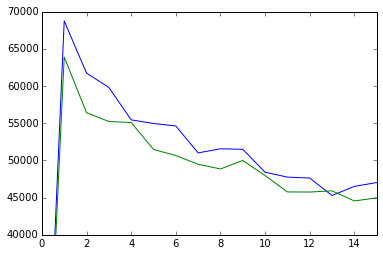

In [22]:
plt.plot(np.arange(compo+1),BIC[:,2])
plt.plot(np.arange(compo+1),BIC[:,3])
plt.xlim(0,15)
plt.ylim(40000,70000)

In [23]:
# para los datos sin re-escalar, agrupamiento por mixtura gaussiana de componentes: 4,8,13
kcomp=4
gmm = GMM(kcomp, covariance_type='full', random_state=0)
gmm.fit(listaexp[:,2:5])
cluster_label_stacked = gmm.predict(listaexp[:,2:5])
print kcomp, gmm.bic(listaexp[:,2:5])
# se almacenan los datos para procesarlos con bash con el fin de colapsar la lista expandida
listastacked=np.vstack((listaexp.T,cluster_label_stacked)).T
np.savetxt('lisstck.txt',listastacked)

4 55089.3107671


In [24]:
%%bash
uniq -c lisstck.txt > listcomp.txt
rm lisstck.txt

<matplotlib.colorbar.Colorbar instance at 0x7feaca6c0518>

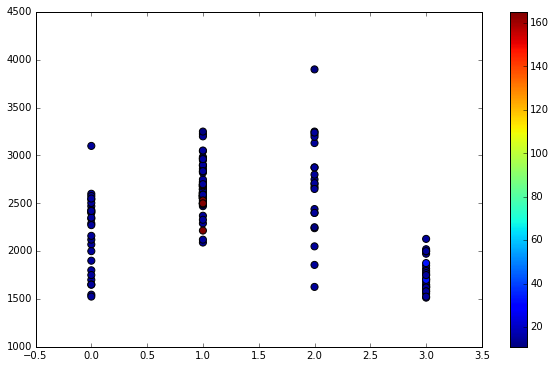

In [25]:
# distribución de grupos vs. altura vs. pesos estadísticos
listcomp=np.loadtxt('listcomp.txt')
plt.figure(figsize=(10,6))
plt.scatter(listcomp[:,6],listcomp[:,5],c=probarr3*165*16,s=50)
plt.colorbar()

(-5, 14)

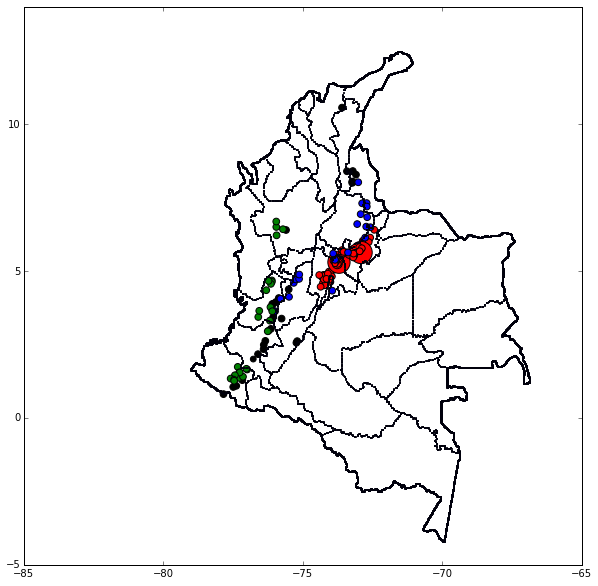

In [26]:
# clusters favoritos (encima de 2000 metros) son 0,2
plt.figure(figsize=(10,10))
#filter=(np.ones(len(listcomp12[:,6]))).astype(bool)
#listcomp12[:,6][filter]
filter=(listcomp[:,6]==0)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='k',s=probarr3*165*16*3)
filter=(listcomp[:,6]==1)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='r',s=probarr3*165*16*3)
filter=(listcomp[:,6]==2)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='b',s=probarr3*165*16*3)
filter=(listcomp[:,6]==3)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='g',s=probarr3*165*16*3)
plt.scatter(colvec[:,0],colvec[:,1],s=1)

#plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [56]:
# re-escalamos los datos para darle más importancia al agrupamiento por alturas (similares pisos térmicos)
# el agrupamiento se hace por lon,lat,alt
from sklearn import preprocessing
X_scaled = preprocessing.scale(listaexp[:,2:5])

In [57]:
# clustering por mixtura gaussiana de la lista expandida, buscando un mínimo local para el criterio de información bayesiano
# el agrupamiento se hace por lon,lat,alt
cv_types = ['spherical', 'tied', 'diag', 'full']
bicold=0
compo=20
BIC=np.zeros((compo+1,4))
kik=0
for cv_type in cv_types:
    for kcomp in np.arange(compo)+1:        
        gmm = GMM(kcomp, covariance_type=cv_type, random_state=0)
        gmm.fit(X_scaled[:,2:5])
#        if bicold<gmm.bic(listaexp12[:,2:5]):
        print cv_type,kcomp,gmm.bic(X_scaled[:,2:5]);
        BIC[kcomp,kik]=gmm.bic(X_scaled[:,2:5])
        bicold=gmm.bic(X_scaled[:,2:5])
    kik+=1

spherical 1 8804.98319947
spherical 2 7551.38704631
spherical 3 7408.23092038
spherical 4 7172.35196207
spherical 5 7204.27750451
spherical 6 7184.23372738
spherical 7 7183.46631575
spherical 8 7202.85273078
spherical 9 7236.08625015
spherical 10 7263.77543863
spherical 11 7288.61691506
spherical 12 7303.22466353
spherical 13 7234.00273906
spherical 14 7240.89680555
spherical 15 7285.67248703
spherical 16 7297.49588934
spherical 17 7328.8841818
spherical 18 7354.31355641
spherical 19 7380.26622386
spherical 20 7411.22878905
tied 1 8804.98319947
tied 2 8197.40159145
tied 3 8202.85203512
tied 4 7830.01208934
tied 5 7845.23412841
tied 6 7868.03610264
tied 7 7884.71153802
tied 8 7763.29356061
tied 9 7261.84616757
tied 10 7277.88588632
tied 11 7294.80276544
tied 12 7311.35570446
tied 13 7326.83212955
tied 14 7344.60161777
tied 15 7361.23156484
tied 16 7377.56520398
tied 17 7393.6046519
tied 18 7413.67545818
tied 19 7425.94242365
tied 20 7445.39389464
diag 1 8804.98319947
diag 2 7551.3870463

(7000, 9000)

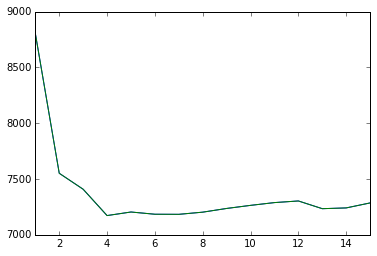

In [47]:
plt.plot(np.arange(compo+1),BIC[:,0])
plt.plot(np.arange(compo+1),BIC[:,3])
plt.xlim(1,15)
plt.ylim(7000,9000)

In [62]:
# para los datos re-escalados, agrupamiento por mixtura gaussiana de componentes
kcomp=4
gmm = GMM(kcomp, covariance_type='full', random_state=0)
gmm.fit(X_scaled[:,2:5])
cluster_label_stacked_sc = gmm.predict(X_scaled[:,2:5])
print kcomp, gmm.bic(X_scaled[:,2:5])
# se almacenan los datos para procesarlos con bash con el fin de colapsar la lista expandida
listastackedsc=np.vstack((listaexp.T,cluster_label_stacked_sc)).T
np.savetxt('lisstcksc.txt',listastackedsc)

4 7172.35196207


In [63]:
%%bash
uniq -c lisstcksc.txt > listcompsc.txt
rm lisstcksc.txt

(0, 4500.0)

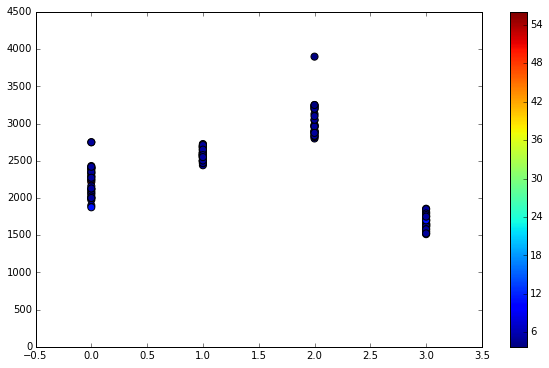

In [64]:
# distribución de grupos vs. altura vs. pesos estadísticos
listcompsc=np.loadtxt('listcompsc.txt')
plt.figure(figsize=(10,6))
plt.scatter(listcompsc[:,6],listcompsc[:,5],c=probarr3*112*8,s=50)
plt.colorbar()
plt.ylim(0)

(-5, 14)

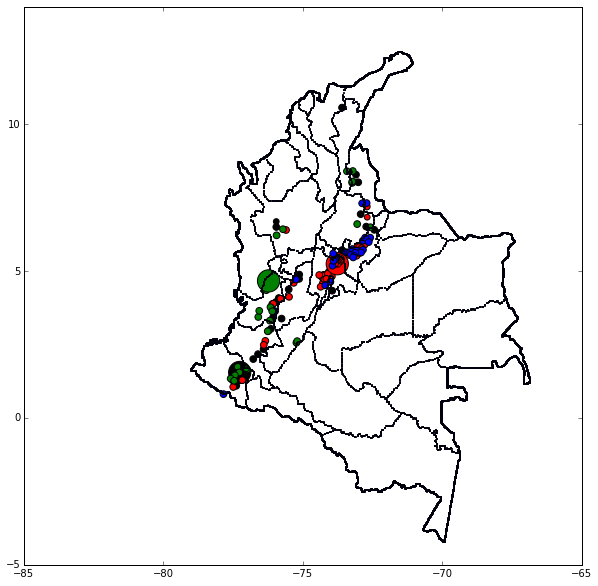

In [65]:
# clusters favoritos (encima de 2000 metros) son 0,2
plt.figure(figsize=(10,10))
#filter=(np.ones(len(listcomp12[:,6]))).astype(bool)
#listcomp12[:,6][filter]
filter=(listcompsc[:,6]==0)
plt.scatter(-listcompsc[:,3][filter],-listcompsc[:,4][filter],c='k',s=probarr3*165*16*3)
filter=(listcompsc[:,6]==1)
plt.scatter(-listcompsc[:,3][filter],-listcompsc[:,4][filter],c='r',s=probarr3*165*16*3)
filter=(listcompsc[:,6]==2)
plt.scatter(-listcompsc[:,3][filter],-listcompsc[:,4][filter],c='b',s=probarr3*165*16*3)
filter=(listcompsc[:,6]==3)
plt.scatter(-listcompsc[:,3][filter],-listcompsc[:,4][filter],c='g',s=probarr3*165*16*3)
plt.scatter(colvec[:,0],colvec[:,1],s=1)

#plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [35]:
for kcomp in range(1,10):
    gmm = GMM(kcomp, covariance_type='full', random_state=0)
    gmm.fit(listacorta[:,2:5])
    cluster_label_geo = gmm.predict(listacorta[:,2:5])
    print kcomp, gmm.bic(listacorta[:,2:5])

1 3327.50203635
2 3095.3831281
3 3098.19387824
4 3122.27434234
5 3107.90032773
6 3129.07931088
7 3127.63163924
8 3131.7537337
9 3117.762888


In [29]:
cluster_label_geo

array([2, 2, 2, 4, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 3, 0, 0, 0, 0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [93]:
uchu=(11,15,33,165)
wdata=0
for i in range(1,5):
    wdata=wdata+(listacorta2[:,0]==i).sum()*uchu[i-1]
wdata

2332

In [163]:
listaexp=np.zeros((wdata,5))
kcount=0
for i in range(len(probarr3)):
    for inde in range(4):
        if listacorta2[i,0]==inde+1:
            for kinx in range(uchu[inde]):
                listaexp[kinx+kcount,:]=listacorta2[i,:]
            kcount=kcount+kinx
    kcount=kcount+1
    

In [247]:
cv_types = ['spherical', 'tied', 'diag', 'full']
#cv_types = ['full'] + 59
bicold=0
for cv_type in cv_types:
    for kcomp in np.arange(10)+1:        
        gmm = GMM(kcomp, covariance_type=cv_type, random_state=0)
        gmm.fit(listaexp[:,2:5])
        if bicold<gmm.bic(listaexp[:,2:5]):
            print cv_type,kcomp,gmm.bic(listaexp[:,2:5])
        bicold=gmm.bic(listaexp[:,2:5])
        

spherical 1 96407.7243526
tied 4 45046.9618587
tied 8 44186.8584845
tied 10 43824.3678405
diag 1 51888.9322887
diag 9 40498.4057262
full 1 49307.2352584


In [248]:
kcomp=9
gmm = GMM(kcomp, covariance_type='diag', random_state=0)
gmm.fit(listaexp[:,2:5])
cluster_label_stacked = gmm.predict(listaexp[:,2:5])
print kcomp, gmm.bic(listaexp[:,2:5])

9 40498.4057262


In [249]:
listastacked=np.vstack((listaexp.T,cluster_label_stacked)).T

In [250]:
np.savetxt('lisstck.txt',listastacked)

In [252]:
%%bash
uniq -c lisstck.txt > listcomp.txt


In [253]:
listcomp=np.loadtxt('listcomp.txt')

(-5, 14)

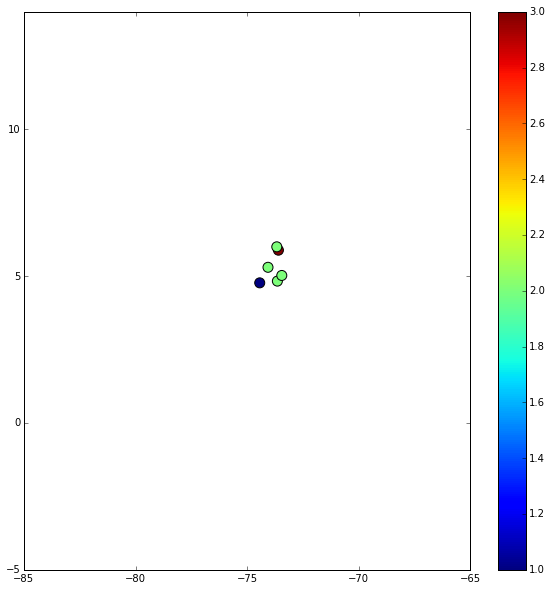

In [280]:
plt.figure(figsize=(10,10))
filter=(listcomp[:,6]==8)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c=listcomp[:,1][filter],s=100)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

<matplotlib.colorbar.Colorbar instance at 0x7f77e4ecc200>

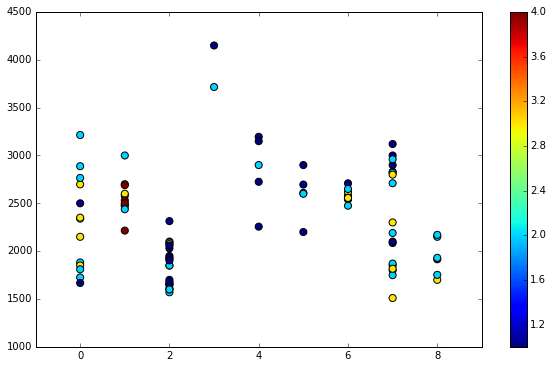

In [255]:
plt.figure(figsize=(10,6))

plt.scatter(listcomp[:,6],listcomp[:,5],c=listcomp[:,1],s=50)
plt.colorbar()


(-5, 14)

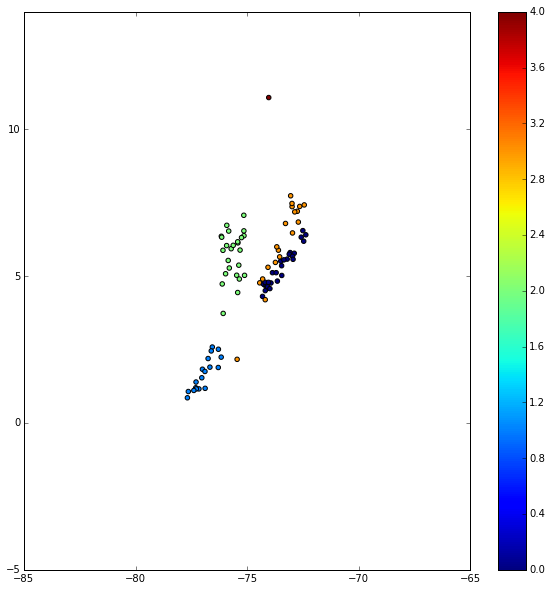

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta2[:,2],-listacorta2[:,3],c=cluster_label_geo)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

(-5, 14)

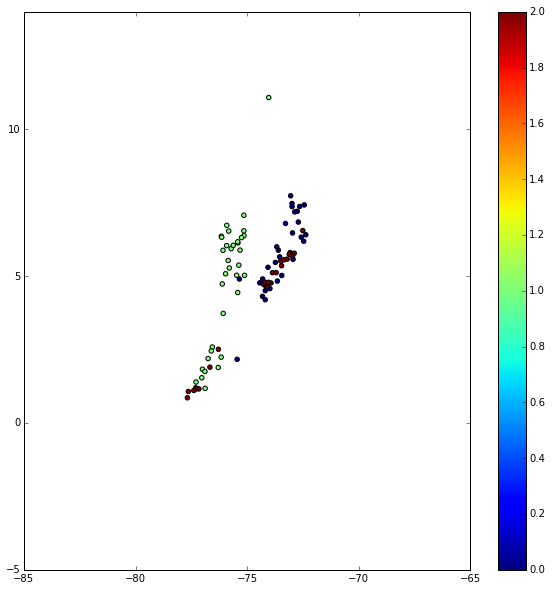

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta2[:,2],-listacorta2[:,3],c=cluster_label_geo)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

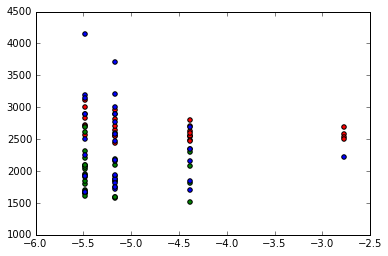

In [49]:
plt.scatter(np.log(probarr3[cluster_label_geo==2]),listacorta2[:,4][cluster_label_geo==2],c='r')
plt.scatter(np.log(probarr3[cluster_label_geo==1]),listacorta2[:,4][cluster_label_geo==1],c='g')
plt.scatter(np.log(probarr3[cluster_label_geo==0]),listacorta2[:,4][cluster_label_geo==0],c='b')


(-5, 14)

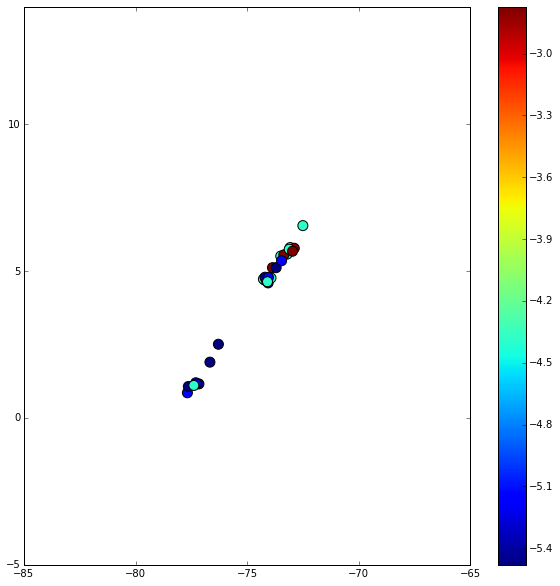

In [80]:
# Grupo 
plt.figure(figsize=(10,10))
plt.scatter(-listacorta2[:,2][cluster_label_geo==2],-listacorta2[:,3][cluster_label_geo==2],c=np.log(probarr3[cluster_label_geo==2]),s=100)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

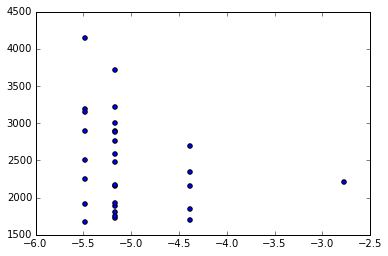

In [54]:
plt.scatter(np.log(probarr3[cluster_label_geo==0]),listacorta2[:,4][cluster_label_geo==0],c='b')

In [55]:
listacorta3=listacorta2[cluster_label_geo==0]
probarr4=probarr3[cluster_label_geo==0]

In [59]:
for kcomp in range(1,4):
    gmm = GMM(kcomp, covariance_type='full', random_state=0)
    gmm.fit(listacorta3[:,2:5])
    cluster_label_geo2 = gmm.predict(listacorta3[:,2:5])
    print kcomp, gmm.bic(listacorta3[:,2:5])

1 616.014713896
2 630.102812492
3 616.989885733


(-5, 14)

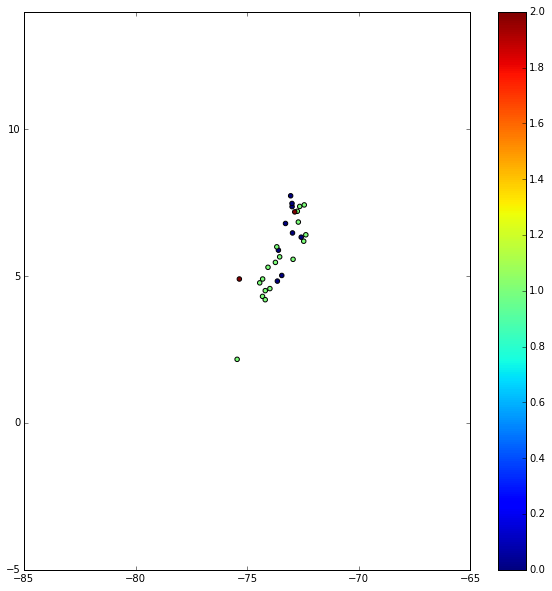

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta3[:,2],-listacorta3[:,3],c=cluster_label_geo2)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

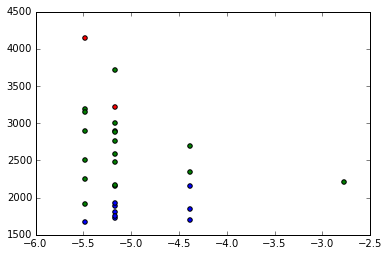

In [61]:
plt.scatter(np.log(probarr4[cluster_label_geo2==2]),listacorta3[:,4][cluster_label_geo2==2],c='r')
plt.scatter(np.log(probarr4[cluster_label_geo2==1]),listacorta3[:,4][cluster_label_geo2==1],c='g')
plt.scatter(np.log(probarr4[cluster_label_geo2==0]),listacorta3[:,4][cluster_label_geo2==0],c='b')

(-5, 14)

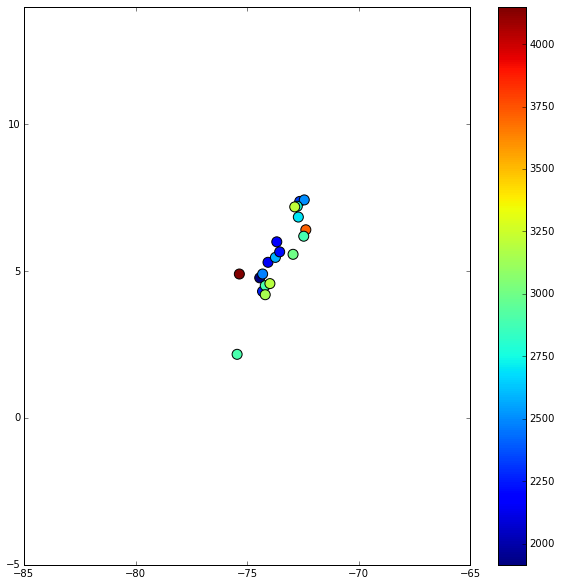

In [73]:
plt.figure(figsize=(10,10))
myfilter=(cluster_label_geo2==1)|(cluster_label_geo2==2)
plt.scatter(-listacorta3[myfilter][:,2],-listacorta3[myfilter][:,3],c=listacorta3[myfilter][:,4],s=100)
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

(5, 8)

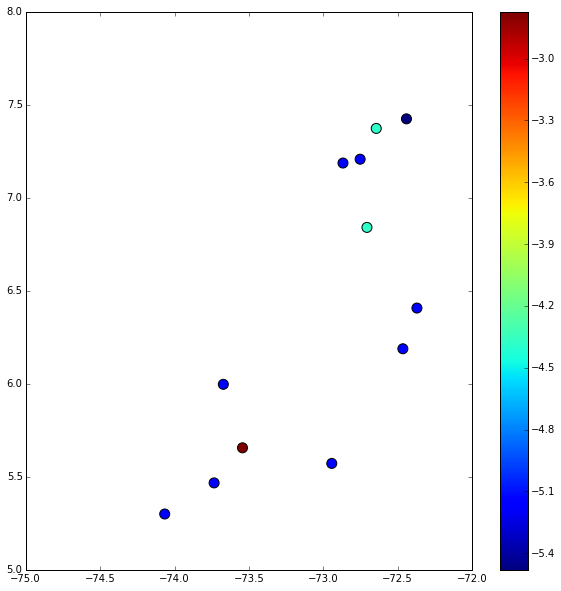

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta3[myfilter][:,2],-listacorta3[myfilter][:,3],c=np.log(probarr4[myfilter]),s=100)
plt.colorbar()
plt.xlim(-75,-72)
plt.ylim(5,8)